In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_LassoRidge\Computer_Data.csv")
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [7]:
# unnamed col is not import drop it
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [9]:
df.shape
# rows=6259 and rows=10

(6259, 10)

In [10]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [12]:
df.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [13]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


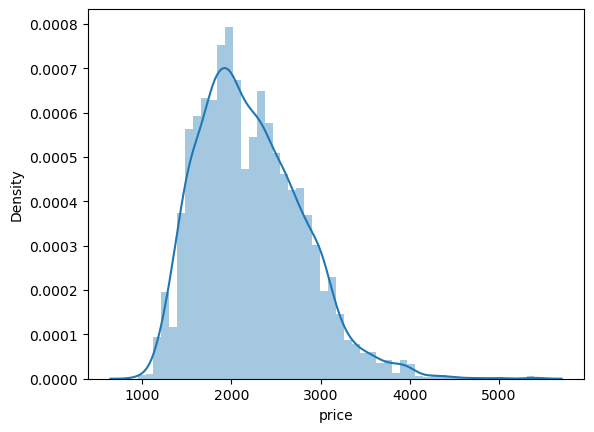

In [14]:
sns.distplot(df["price"])
plt.show()
# data is right skewed

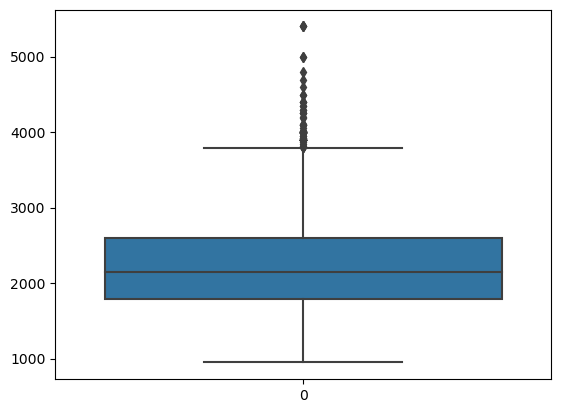

In [15]:
sns.boxplot(df["price"])
plt.show()
# outliers are present

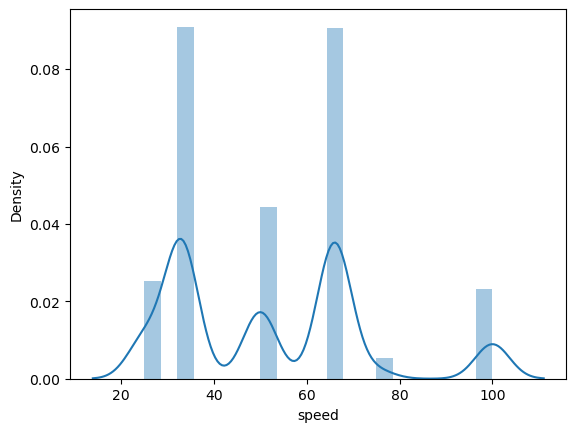

In [16]:
sns.distplot(df["speed"])
plt.show()
# data is normally distributed

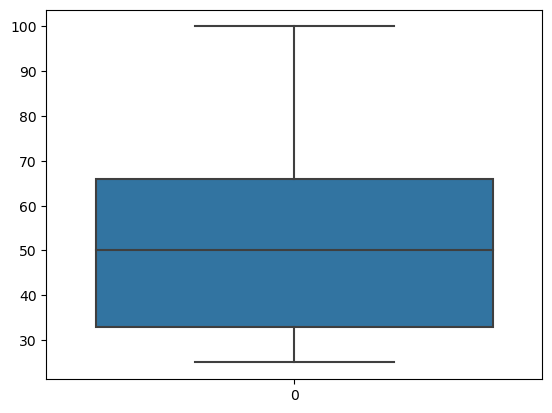

In [17]:
sns.boxplot(df["speed"])
plt.show()

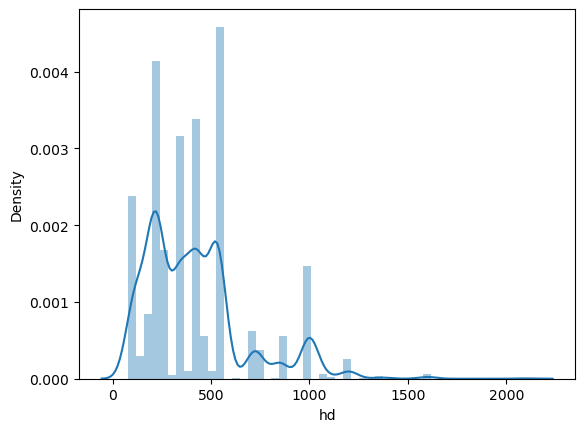

In [18]:
sns.distplot(df["hd"])
plt.show()
# right skewed data

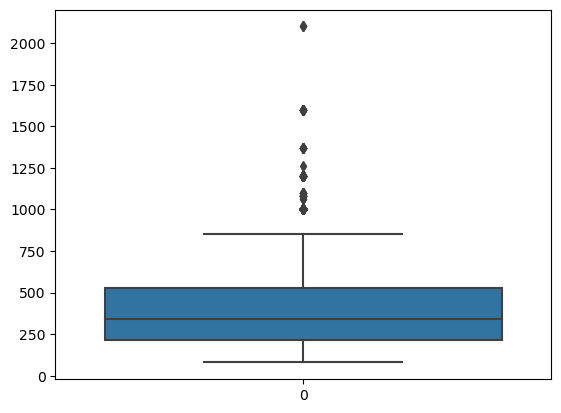

In [19]:
sns.boxplot(df["hd"])
plt.show()
# outliers are present

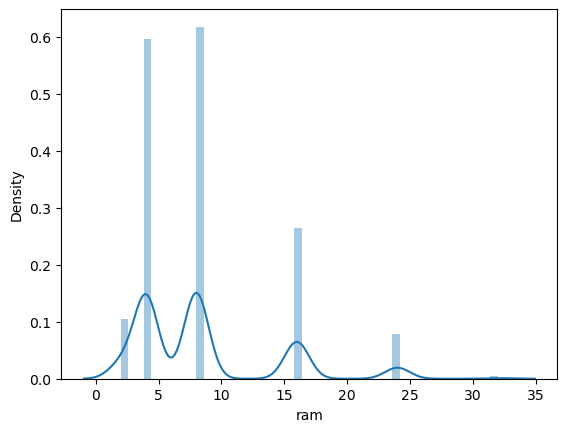

In [20]:
sns.distplot(df["ram"])
plt.show()
# normally distributed

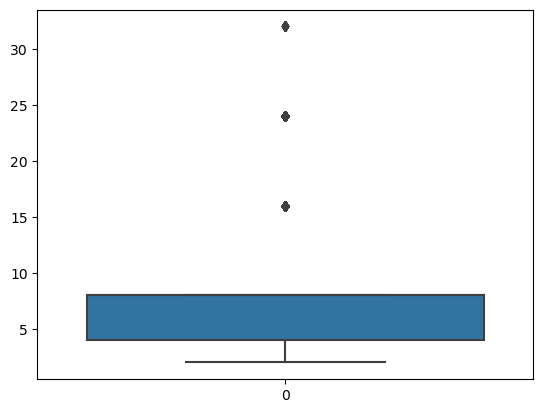

In [21]:
sns.boxplot(df["ram"])
plt.show()
# outliers are present

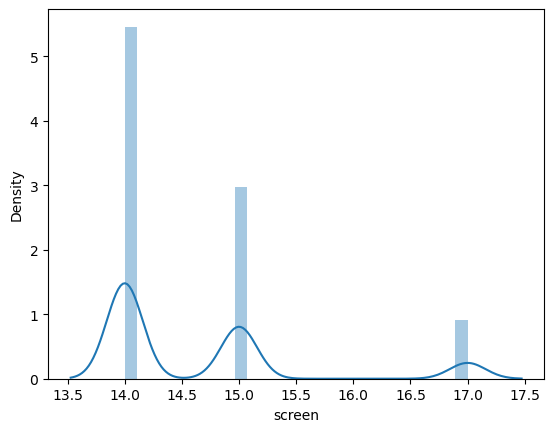

In [22]:
sns.distplot(df["screen"])
plt.show()
# normally distributed

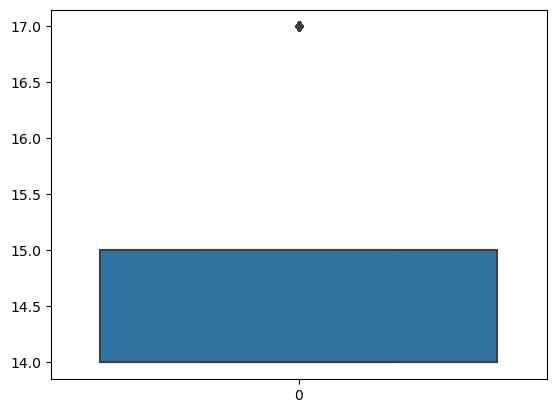

In [23]:
sns.boxplot(df["screen"])
plt.show()
# one outliers is present

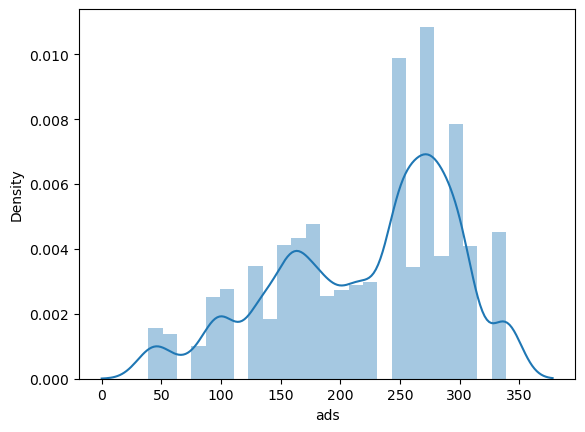

In [24]:
sns.distplot(df["ads"])
plt.show()
# data is left skewed

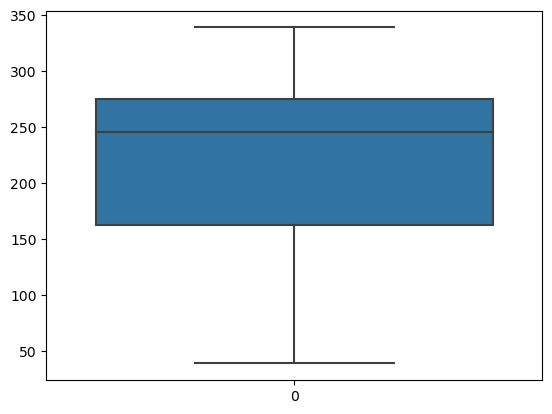

In [25]:
sns.boxplot(df["ads"])
plt.show()
# no outliers

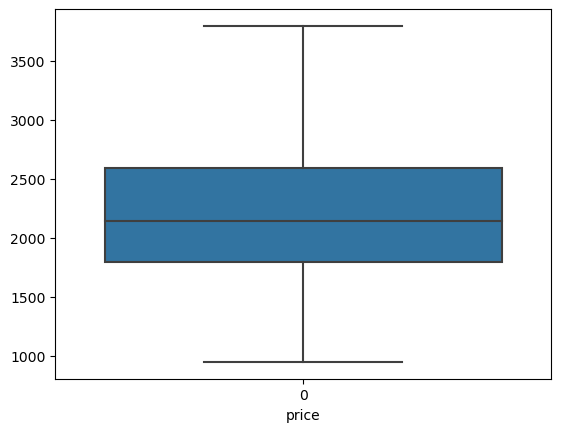

In [26]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['price'])
df['price']=winsor.fit_transform(df[['price']])
sns.boxplot(df['price'])
plt.xlabel('price')
plt.show()
#from boxplot we easily see that outliers are removed..

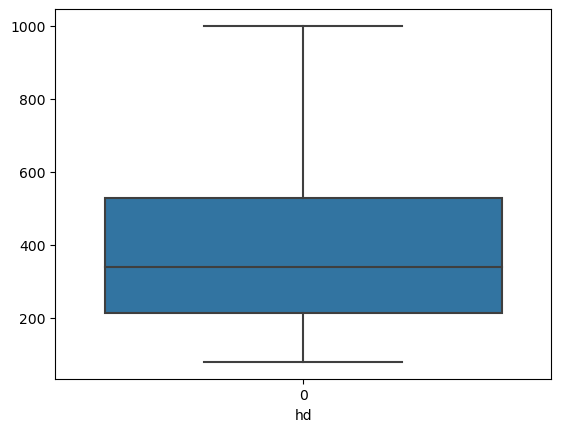

In [27]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['hd'])
df['hd']=winsor.fit_transform(df[['hd']])
sns.boxplot(df['hd'])
plt.xlabel('hd')
plt.show()
#from boxplot we easily see that outliers are removed..

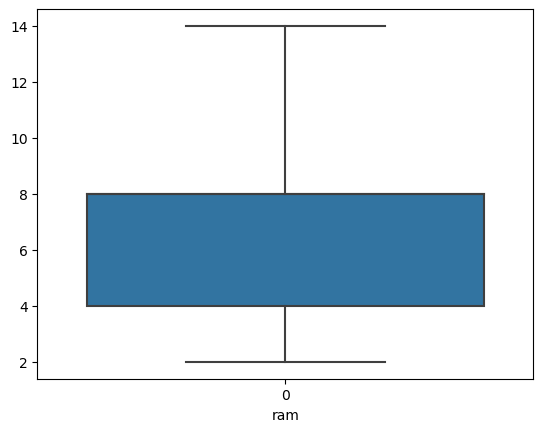

In [28]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['ram'])
df['ram']=winsor.fit_transform(df[['ram']])
sns.boxplot(df['ram'])
plt.xlabel('ram')
plt.show()
#from boxplot we easily see that outliers are removed..

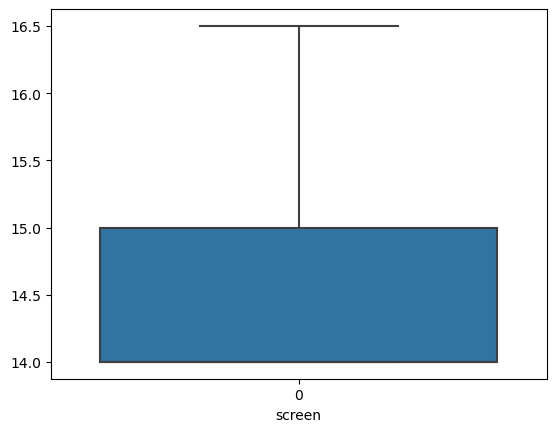

In [29]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['screen'])
df['screen']=winsor.fit_transform(df[['screen']])
sns.boxplot(df['screen'])
plt.xlabel('screen')
plt.show()
#from boxplot we easily see that outliers are removed..

In [30]:
df.describe(include="O")

,cd,multi,premium
count,6259,6259,6259
unique,2,2,2
top,no,no,yes
freq,3351,5386,5647


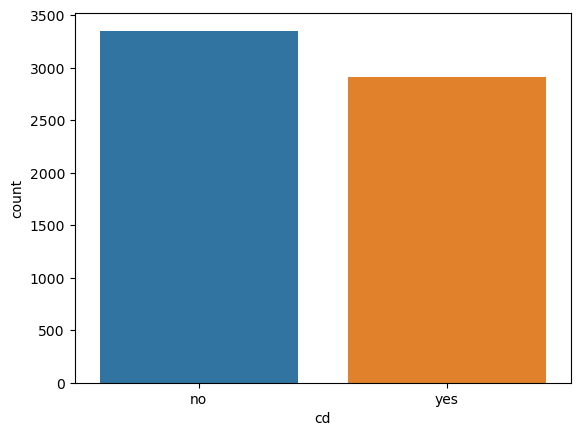

In [31]:
df["cd"].value_counts()
sns.countplot(x=df["cd"])
plt.show()

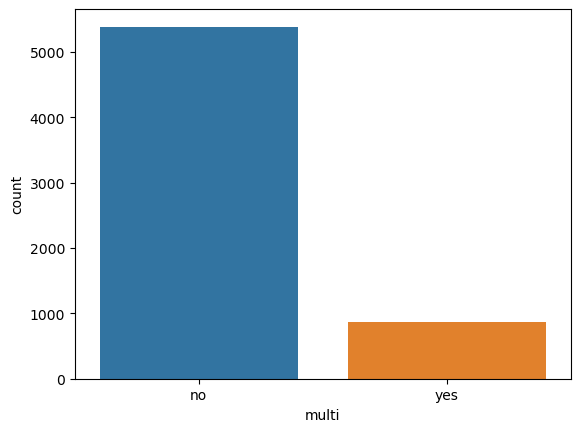

In [32]:
df["multi"].value_counts()
sns.countplot(x=df["multi"])
plt.show()

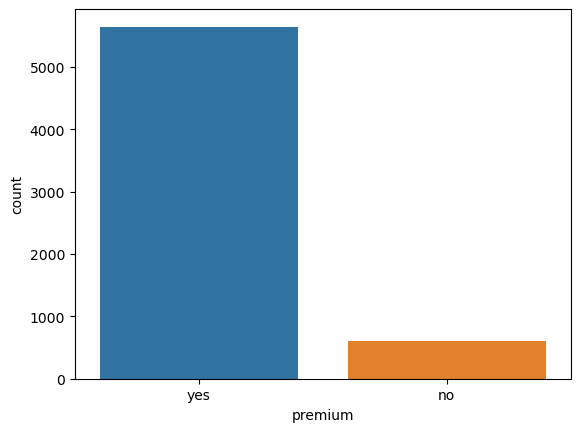

In [33]:
df["premium"].value_counts()
sns.countplot(x=df["premium"])
plt.show()

In [34]:
le=LabelEncoder()
df["cd"]=le.fit_transform(df["cd"])
df["multi"]=le.fit_transform(df["multi"])
df["premium"]=le.fit_transform(df["premium"])

In [35]:
df["cd"].value_counts()

0    3351
1    2908
Name: cd, dtype: int64

In [36]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499.0,25,80,4,14.0,0,0,1,94,1
1,1795.0,33,85,2,14.0,0,0,1,94,1
2,1595.0,25,170,4,15.0,0,0,1,94,1
3,1849.0,25,170,8,14.0,0,0,0,94,1
4,3295.0,33,340,14,14.0,0,0,1,94,1


In [67]:
# split the data
x=df.drop(["price"],axis=1)
y=df["price"]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [105]:
x_train.shape

(5007, 9)

In [107]:
y_train.shape

(5007,)

In [69]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=model.predict(x_test)

In [71]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

70552.29876253573


In [72]:
r2=r2_score(y_test,y_pred)
print(r2)

0.7868709942574317


In [73]:
model.score(x_test,y_test)

0.7868709942574317

In [74]:
model.score(x_train,y_train)

0.7807563574022726

In [93]:
ridge_alpha=0.02
lasso_alpha=0.01

In [94]:
ridge=Ridge(alpha=ridge_alpha)
lasso=Lasso(alpha=lasso_alpha)

In [95]:
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [96]:
ridge_pred=model.predict(x_test)
lasso_pred=model.predict(x_test)

In [97]:
r2_ridge=r2_score(y_test,ridge_pred)
print(r2_ridge)

0.7868709942574317


In [98]:
r2_lasso=r2_score(y_test,lasso_pred)
print(r2_lasso)

0.7868709942574317
